In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("/home/mittesh/Orinson_technologies/ML-Linear-Regression/data/HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [13]:
df = df.drop(columns = "Index")
df.shape

(25000, 2)

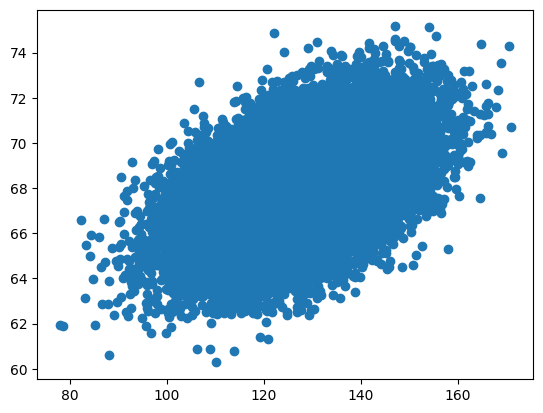

In [14]:
# scatter plot
plt.scatter(df['Weight(Pounds)'], df['Height(Inches)'])

In [15]:
# corelation
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


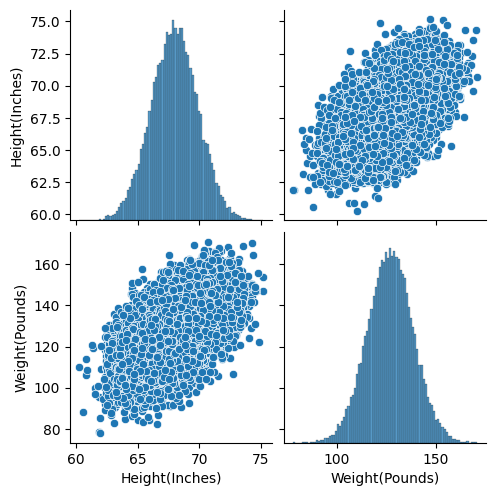

In [16]:
# seaborn for visualization
sns.pairplot(df)

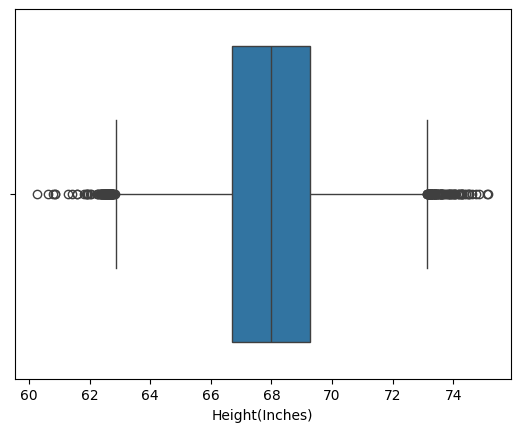

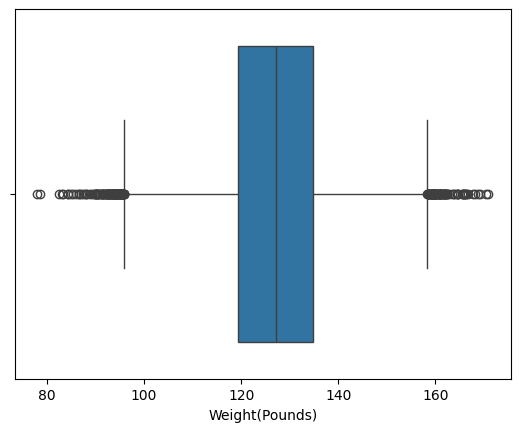

In [17]:
for col in df.columns:
    sns.boxplot(
        data = df,
        x = df[col]
    )
    plt.show()

In [19]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f'Lower bound:\n{lower}\n\nUpper bound:\n{upper}')


Lower bound:
Height(Inches)    62.851557
Weight(Pounds)    95.932412
dtype: float64

Upper bound:
Height(Inches)     73.125798
Weight(Pounds)    158.269113
dtype: float64


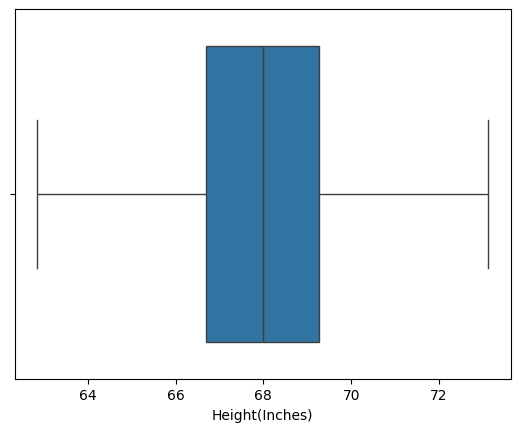

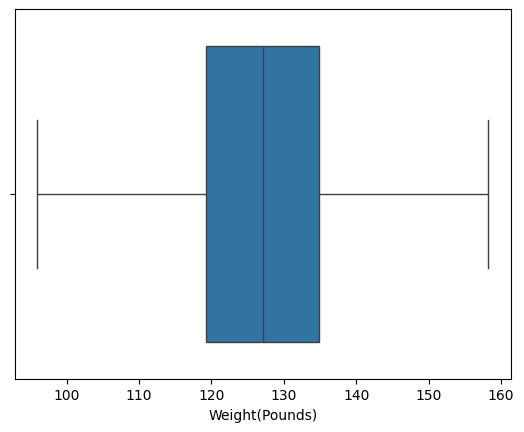

In [21]:
for col in df.columns:
    df[col] = np.where(df[col] > upper[col],upper[col],df[col])
    df[col] = np.where(df[col] < lower[col],lower[col],df[col])

    sns.boxplot(
        data = df,
        x = df[col]
    )
    
    plt.show()

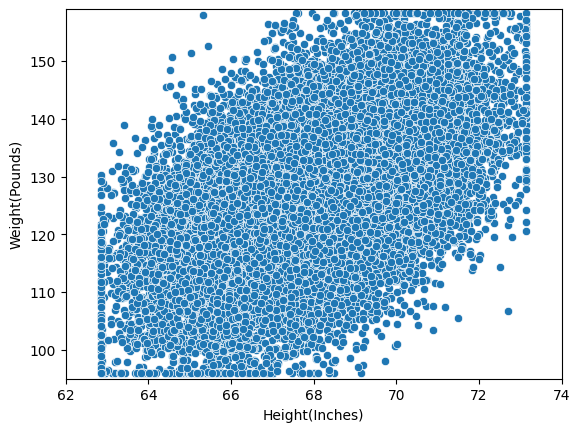

In [22]:
sns.scatterplot(
    x = 'Height(Inches)',
    y = 'Weight(Pounds)',
    data = df
)
plt.xlim(62, 74)
plt.ylim(95, 159)
plt.show()

In [23]:
df.head(5)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [24]:
y=df['Weight(Pounds)']
X=df[["Height(Inches)"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)